In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys
#sys.path.append("/Users/ajc/Core/PostProcessData/PyScript")
sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata as rd
import os

In [4]:
#mesh_file='/Users/ajc/FUSE/ats-tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/coweeta/test2'
#path_cades='/Users/ajc/FUSE/simulations/tests/ats-tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/coweeta/Srun2'
#path_cades='/Users/ajc/FUSE/tests/ats-tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/coweeta/Srun2'

path = '/Users/ajc/FUSE2/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic/test1/'
#path='/Users/ajc/FUSE1/simulations/tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/coweeta/test1/'

In [5]:
infile = [os.path.join(path,'visdump_surface_data.h5'), os.path.join(path,'visdump_surface_mesh.h5') ]
print (infile)
mesh = h5py.File(infile[1],'r')
mesh_data = list(mesh['0']['Mesh']['Nodes'])

C_data = rd.GetSurfVarFromVis_All(infile[0],'surface-total_component_concentration',suffix='.cell.Tracer1')
Concentration = C_data['surface-total_component_concentration']
cycles = len(Concentration)
print (len(Concentration))

['/Users/ajc/FUSE2/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic/test1/visdump_surface_data.h5', '/Users/ajc/FUSE2/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic/test1/visdump_surface_mesh.h5']
46


In [6]:
X_mesh = []
Y_mesh = []
Z_mesh = []

for m in mesh_data:
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])
print (len(Concentration))


46


[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
HERE1:  0 1 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] 1 1


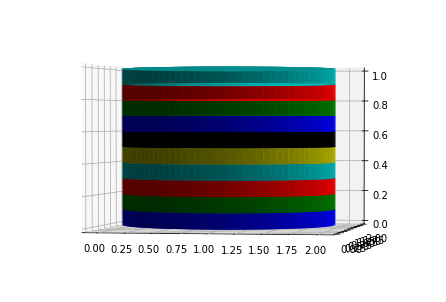

In [7]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

from mpl_toolkits.mplot3d import Axes3D 

import numpy
import matplotlib 
import matplotlib.pyplot as plt


def plot_cylinder_element(x, y, z, dz, rx = 5, ry = 5, color = "b"):
    """
    x: left, right
    z: start height
    dz: height of cylinder
    rx, ry = radius of width (x) and depth (y)
    color = color

    Inspired by:
http://matplotlib.1069221.n5.nabble.com/plot-surface-shading-and-clipping-error-td14031.html
    """

    N = 100             # number of elements
    # a lower stride will give more faces. A cylinder with 4 faces is a cube :)
    # I think with N=100 and rstride=2, it will have 50 faces
    # cstride is the height, rstride the circle
    cstride_side = 1000 # only 1 element needed
    rstride_side = 1    # many elements to make a nice cylinder shape
    cstride_top = 10    
    rstride_top = 10

    # parameters of cylinder
    phi = numpy.linspace(0, 2 * numpy.pi, N) 
    _r = numpy.ones(N) 
    _h = numpy.linspace(0, 1, N) 

    # cylinder
    _x = rx * numpy.outer(numpy.cos(phi), _r) + x
    _y = ry * numpy.outer(numpy.sin(phi), _r) + y
    _z = dz * numpy.outer(numpy.ones(numpy.size(_r)), _h) + z
    ax.plot_surface(_x, _y, _z, rstride = rstride_side, cstride = cstride_side, linewidth = 0, alpha = 1, color = color) 

    # to cover the gaps between the faces, plot the cylinder again at a slightly smaller radius
    _x *= 0.99
    _y *= 0.99
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 

    # top
    _x = rx * numpy.outer(numpy.cos(phi), _h) + x
    _y = ry * numpy.outer(numpy.sin(phi), _h) + y
    _z = numpy.zeros([N,N]) + z + dz + 0.1*0
    #print (_y)
    ax.plot_surface(_x, _y, _z,  rstride = rstride_top, cstride = cstride_top, linewidth = 0, alpha = 1, color = color) 

    # plot again with different stride to mask the gaps    
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 


def plot_cylinder(x, y, z, rx = 5, ry = 0):
    """
    x: left-right for each cylinder
    z: list height difference (ie. not cumulative) 
    """
    # list with colors
    colors = ["b", "g", "r", "c", "y", "k"]
    # plot cylinder elements
    _z = 0
    #y = x
    for i in range(len(z)):
        plot_cylinder_element(x, y, _z, z[i], rx = rx, ry = ry, color = colors[i % len(colors)])  
        _z += z[i]


def cylinder_plot(x0, y0, z, r = 10, dr = 30):
    """
    z: list of different cylinders with for each a list height difference (ie. not cumulative)
    r: radius
    dr: distance between cylinders    
    """
    # different cylinders next to each other
    x = x0 #numpy.arange(len(z)) * dr
    # possible difference between width (x) and depth (y)
    rx = 1 #r
    ry = 1 #0*r
    y = y0
    # make cylinders
    for i in range(len(z)):
        print ('HERE1: ',i,x[i], z[i], rx,ry)
        plot_cylinder(x[i], y[i], z[i], rx = rx, ry = ry)


# close earlier plots
plt.close("all")

# make figure
fig = plt.figure() 
ax = Axes3D(fig) 

# set 3D-view
ax.view_init(elev = 1, azim = 280)

# make 3 cylinders, with a different number of elements
z1 = [0.1,]*10
x0 =[1,4,6]
y0 =[1,4,6]
print (z1)
#cylinder_plot(x0,y0, [[5, 10, 5], [3, 5], [1,2,3,4]])

cylinder_plot(x0,y0, [z1])

# set the labels
#ax.set_xlabel('X') 
#ax.set_ylabel('Y') 
#ax.set_zlabel('Z')

# show
#plt.show() 

In [8]:
#path='/Users/ajc/Core/PostProcessData/2019/simulations/transport/Srun2/'
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/Hyporheic/Coweeta/may26/test0A/'

In [12]:
#Write solute concentration images to a directory
%matplotlib qt

#fig = plt.figure()
#ax = fig.gca(projection='3d')

x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]
count = 0

for k in range(cycles):
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    y1 = y_orig
    y2 = [i + 0.000001 for i in y1]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    
    data_color = cm.jet(Z_data/np.amax(Z_data))
    #ran = [f*1 for f in flux_interpolate] #Discharge_stream
    ran = Concentration[k]
    #print (ran)
    ran = [r*1e-3 if r>0 else 1e-12 for r in ran]
    sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=cm.coolwarm,vmin=1e-4,vmax=1,norm=matplotlib.colors.LogNorm())
    #sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=cm.tab10,vmin=0,vmax=1)
    #,vmin=0,vmax=10) map=plt.cm.get_cmap('prism', 5)) cm.tab10
    
    plt.colorbar(sc, label='Discharge [cm$^3$/sec]',shrink=.96)#,aspect=10)
   
    #ax.set_zlim(0,0.0)
    #ax.set_zticks([])

    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_xticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=45, fontsize=10)
    
    xmin, xmax = ax.get_ylim()
    ax.set_yticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_yticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=0, fontsize=10)
    ax.grid(False)
    plt.tight_layout(h_pad=1)
    #break
    plt.savefig(outfile + 'fig_%s.png'%k,dpi=100)
    count +=1
    #if count >2:
    #    break
    plt.close()

In [ ]:
import re, os

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

dir_files = os.listdir(path)

Files = sorted_nicely(dir_files)

Files = [f for f in Files if f.endswith('.png')]
import cv2
import numpy as np
Files = Files[:60] + Files[450:520] #+ Files[37:70]
img_array = []
for filename in Files[::1]:
    filename = path + filename
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    


In [ ]:
out = cv2.VideoWriter(path + 'stream-transport-coweeta.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
path='/Users/ajc/Core/PostProcessData/2019/simulations/transport/plots_1014/'
%matplotlib tk
x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]

for k in range(cycles):
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    y1 = y_orig
    y2 = [i + 0.000001 for i in y1]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    
    data_color = cm.jet(Z_data/np.amax(Z_data))
    #ran = Discharge_stream
    ran = Concentration[140]#[k+120]
    ran = [r if r>0 else 1e-12 for r in ran]
    #print (ran)
    sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=cm.coolwarm,vmin=1e-3,vmax=1,norm=matplotlib.colors.LogNorm())
    #sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=cm.tab10,vmin=0,vmax=1)# map=plt.cm.get_cmap('prism', 5))
    #plt.colorbar(sc, label='Discharge [cm$^3$/sec]',shrink=.96)#,aspect=10)
    plt.colorbar(sc, label='Concentration [kg/m$^3$]',shrink=.96)#,aspect=10)
    
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_xticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=45, fontsize=10)
    
    xmin, xmax = ax.get_ylim()
    ax.set_yticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_yticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=0, fontsize=10)
    ax.grid(False)
    plt.tight_layout(h_pad=1)
   
    #plt.savefig(path + 'figs_%s.png'%k,dpi=500)
    break
    plt.close()
    #break

In [ ]:
#Load all images
"""
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob(path+'*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
"""